In [22]:
from ultralytics import YOLO
import cv2
import os

# --- Cấu hình ---
MODEL_PATH = 'yolov8n.pt'         # YOLOv8 mặc định
IMAGE_PATH = '20251024_092441.jpg'
OUTPUT_IMAGE_PATH = 'ket_qua_yolov8_macdinh_4lop.jpg'
CONF_THRES = 0.25
# -----------------

# Các class cần giữ lại (trong COCO)
# car=2, motorcycle=3, bus=5, truck=7
TARGET_CLASSES = {2, 3, 5, 7}

def run_yolo_default():
    # 1. Kiểm tra ảnh có tồn tại không
    if not os.path.exists(IMAGE_PATH):
        print(f"Lỗi: Không tìm thấy ảnh tại '{IMAGE_PATH}'")
        return

    # 2. Tải mô hình YOLOv8 mặc định
    print(f"Đang tải mô hình YOLO mặc định: {MODEL_PATH}")
    model = YOLO(MODEL_PATH)

    # 3. Đọc ảnh
    img = cv2.imread(IMAGE_PATH)
    H, W, _ = img.shape
    print(f"Đã tải ảnh: {IMAGE_PATH} (Kích thước: {W}x{H})")

    # 4. Chạy suy luận
    print("Đang chạy dự đoán với YOLOv8 mặc định...")
    results = model(IMAGE_PATH, conf=CONF_THRES)
    result = results[0]

    # 5. Lấy dữ liệu dự đoán
    boxes = result.boxes.xyxy.cpu().numpy()
    confs = result.boxes.conf.cpu().numpy()
    clss = result.boxes.cls.cpu().numpy().astype(int)
    names = result.names

    annotated = img.copy()

    # 6. Vẽ bounding box (chỉ giữ 4 lớp cần thiết)
    for i, box in enumerate(boxes):
        cls_id = clss[i]
        if cls_id not in TARGET_CLASSES:
            continue  # bỏ qua các lớp khác

        x1, y1, x2, y2 = map(int, box)
        conf = confs[i]
        label = f"{names[cls_id]} {conf:.2f}"

        # Vẽ khung
        cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 200, 255), 1)

        # Hiển thị nhãn nhỏ
        font_scale = 0.4
        thickness = 1
        (w_text, h_text), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        cv2.rectangle(annotated, (x1, y1 - h_text - 4), (x1 + w_text + 2, y1), (0, 200, 255), -1)
        cv2.putText(annotated, label, (x1 + 1, y1 - 3),
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)

    # 7. Lưu ảnh kết quả
    try:
        cv2.imwrite(OUTPUT_IMAGE_PATH, annotated)
        print(f"✅ ĐÃ LƯU KẾT QUẢ YOLOv8 (4 lớp: car, bus, truck, motorcycle) vào file: '{OUTPUT_IMAGE_PATH}'")
    except Exception as e:
        print(f"Lỗi khi lưu ảnh: {e}")

    print("Hoàn thành chạy YOLOv8 mặc định với lọc 4 lớp.")

if __name__ == "__main__":
    run_yolo_default()


Đang tải mô hình YOLO mặc định: yolov8n.pt
Đã tải ảnh: 20251024_092441.jpg (Kích thước: 406x266)
Đang chạy dự đoán với YOLOv8 mặc định...

image 1/1 d:\Documents\HK2025\project3\traaaa\model\20251024_092441.jpg: 448x640 12 persons, 3 cars, 11 motorcycles, 41.8ms
Speed: 2.0ms preprocess, 41.8ms inference, 4.6ms postprocess per image at shape (1, 3, 448, 640)
✅ ĐÃ LƯU KẾT QUẢ YOLOv8 (4 lớp: car, bus, truck, motorcycle) vào file: 'ket_qua_yolov8_macdinh_4lop.jpg'
Hoàn thành chạy YOLOv8 mặc định với lọc 4 lớp.


In [1]:
from ultralytics import YOLO
import cv2
import os

# --- Cấu hình ---
MODEL_PATH = 'best.pt'
IMAGE_PATH = '20251024_092441.jpg'
OUTPUT_IMAGE_PATH = 'ket_qua_du_doan.jpg'  # Tên file ảnh kết quả
CONF_THRES = 0.25
# -----------------

def run_prediction():
    # 1. Kiểm tra file tồn tại
    if not os.path.exists(MODEL_PATH):
        print(f"Lỗi: Không tìm thấy file model tại '{MODEL_PATH}'")
        return
    if not os.path.exists(IMAGE_PATH):
        print(f"Lỗi: Không tìm thấy file ảnh tại '{IMAGE_PATH}'")
        return

    # 2. Tải mô hình YOLO
    print(f"Đang tải mô hình từ {MODEL_PATH}...")
    model = YOLO(MODEL_PATH)

    # 3. Đọc ảnh gốc
    img = cv2.imread(IMAGE_PATH)
    H, W, _ = img.shape
    print(f"Đã tải ảnh: {IMAGE_PATH} (Kích thước: {W}x{H})")

    # 4. Chạy dự đoán
    print("Đang chạy dự đoán...")
    results = model(IMAGE_PATH, conf=CONF_THRES)
    result = results[0]

    # 5. Lấy thông tin
    boxes = result.boxes.xyxy.cpu().numpy()   # Tọa độ [x1, y1, x2, y2]
    confs = result.boxes.conf.cpu().numpy()   # Độ tin cậy
    clss = result.boxes.cls.cpu().numpy()     # Chỉ số lớp
    names = result.names                     # Tên lớp
    keypoints = result.keypoints.xy.cpu().numpy() if result.keypoints is not None else []

    annotated = img.copy()

    # 6. Vẽ thủ công để nhãn nhỏ gọn hơn
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cls_id = int(clss[i])
        conf = confs[i]

        label = f"{names[cls_id]} {conf:.2f}"

        # Vẽ khung (mỏng hơn)
        cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 1)

        # Hiển thị nhãn nhỏ hơn
        font_scale = 0.3
        thickness = 1
        (w_text, h_text), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        cv2.rectangle(annotated, (x1, y1 - h_text - 4), (x1 + w_text + 2, y1), (0, 255, 0), -1)
        cv2.putText(annotated, label, (x1 + 1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)

        # Vẽ keypoints (nếu có)
        if len(keypoints) > 0:
            for (kx, ky) in keypoints[i]:
                if kx > 0 and ky > 0:
                    cv2.circle(annotated, (int(kx), int(ky)), 2, (0, 0, 255), -1)

    # 7. Lưu ảnh kết quả
    try:
        cv2.imwrite(OUTPUT_IMAGE_PATH, annotated)
        print(f"✅ ĐÃ LƯU KẾT QUẢ vào file: '{OUTPUT_IMAGE_PATH}'")
    except Exception as e:
        print(f"Lỗi khi lưu ảnh: {e}")

    print("Hoàn thành.")

if __name__ == "__main__":
    run_prediction()


Đang tải mô hình từ best.pt...
Đã tải ảnh: 20251024_092441.jpg (Kích thước: 406x266)
Đang chạy dự đoán...

image 1/1 d:\Documents\HK2025\project3\traaaa\model\20251024_092441.jpg: 288x416 1 truck, 13 motorcycles, 101.4ms
Speed: 6.3ms preprocess, 101.4ms inference, 17.2ms postprocess per image at shape (1, 3, 288, 416)
✅ ĐÃ LƯU KẾT QUẢ vào file: 'ket_qua_du_doan.jpg'
Hoàn thành.


Đang tải mô hình từ best.pt...
Đã tải ảnh: 20251024_092411.jpg (Kích thước: 406x266)
Đang chạy dự đoán...

image 1/1 d:\Documents\HK2025\project3\traaaa\model\20251024_092411.jpg: 288x416 7 cars, 14 motorcycles, 29.6ms
Speed: 1.2ms preprocess, 29.6ms inference, 3.2ms postprocess per image at shape (1, 3, 288, 416)
✅ ĐÃ LƯU KẾT QUẢ vào file: 'ket_qua_du_doan2.jpg'
Đang hiển thị vector keypoint trên nền trắng...


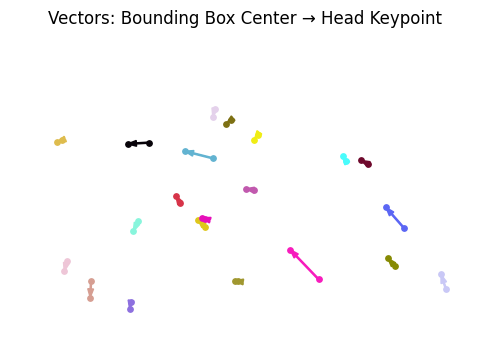

✅ Hoàn thành toàn bộ quá trình.


In [12]:
from ultralytics import YOLO
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# --- Cấu hình ---
MODEL_PATH = 'best.pt'
IMAGE_PATH = '20251024_092411.jpg'
OUTPUT_IMAGE_PATH = 'ket_qua_du_doan2.jpg'  # Ảnh kết quả trực quan YOLO
CONF_THRES = 0.25
# -----------------

def run_prediction():
    # 1. Kiểm tra file tồn tại
    if not os.path.exists(MODEL_PATH):
        print(f"Lỗi: Không tìm thấy file model tại '{MODEL_PATH}'")
        return
    if not os.path.exists(IMAGE_PATH):
        print(f"Lỗi: Không tìm thấy file ảnh tại '{IMAGE_PATH}'")
        return

    # 2. Tải mô hình YOLO
    print(f"Đang tải mô hình từ {MODEL_PATH}...")
    model = YOLO(MODEL_PATH)

    # 3. Đọc ảnh gốc
    img = cv2.imread(IMAGE_PATH)
    H, W, _ = img.shape
    print(f"Đã tải ảnh: {IMAGE_PATH} (Kích thước: {W}x{H})")

    # 4. Chạy dự đoán
    print("Đang chạy dự đoán...")
    results = model(IMAGE_PATH, conf=CONF_THRES)
    result = results[0]

    # 5. Lấy thông tin
    boxes = result.boxes.xyxy.cpu().numpy()   # [x1, y1, x2, y2]
    confs = result.boxes.conf.cpu().numpy()   # confidence
    clss = result.boxes.cls.cpu().numpy()     # class id
    names = result.names                      # class names
    keypoints = result.keypoints.xy.cpu().numpy() if result.keypoints is not None else []

    annotated = img.copy()

    # 6. Vẽ thủ công kết quả lên ảnh
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cls_id = int(clss[i])
        conf = confs[i]
        label = f"{names[cls_id]} {conf:.2f}"

        # Bounding box
        cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 1)

        # Nhãn nhỏ gọn
        font_scale = 0.4
        thickness = 1
        (w_text, h_text), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        cv2.rectangle(annotated, (x1, y1 - h_text - 4), (x1 + w_text + 2, y1), (0, 255, 0), -1)
        cv2.putText(annotated, label, (x1 + 1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)

        # Keypoint (nếu có)
        if len(keypoints) > 0:
            for (kx, ky) in keypoints[i]:
                if kx > 0 and ky > 0:
                    cv2.circle(annotated, (int(kx), int(ky)), 2, (0, 0, 255), -1)

    # 7. Lưu ảnh kết quả
    try:
        cv2.imwrite(OUTPUT_IMAGE_PATH, annotated)
        print(f"✅ ĐÃ LƯU KẾT QUẢ vào file: '{OUTPUT_IMAGE_PATH}'")
    except Exception as e:
        print(f"Lỗi khi lưu ảnh: {e}")

    # 8. Hiển thị biểu đồ vector (từ tâm bbox → keypoint “head”)
    if len(keypoints) > 0:
        print("Đang hiển thị vector keypoint trên nền trắng...")

        # Tạo nền trắng
        white_bg = np.ones((H, W, 3), dtype=np.uint8) * 255

        plt.figure(figsize=(8, 4))
        plt.imshow(white_bg)
        plt.title("Vectors: Bounding Box Center → Head Keypoint")
        plt.axis("off")

        # Vẽ vector
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = box
            cx, cy = (x1 + x2) / 2, (y1 + y2) / 2  # tâm bbox

            # Giả sử keypoint 0 là “head” (vì kpt_shape = [1,3])
            head_x, head_y = keypoints[i][0]

            # Bỏ qua nếu điểm không hợp lệ
            if head_x <= 0 or head_y <= 0:
                continue

            dx, dy = head_x - cx, head_y - cy
            color = np.random.rand(3,)  # màu ngẫu nhiên cho mỗi vector
            plt.arrow(cx, cy, dx, dy, color=color, width=1.0, head_width=5, length_includes_head=True)
            plt.scatter([cx, head_x], [cy, head_y], color=[color], s=15)

        plt.show()

    print("✅ Hoàn thành toàn bộ quá trình.")

if __name__ == "__main__":
    run_prediction()
